In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv("bank-additional-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Select columns to encode
categorical_columns = ['housing', 'loan', 'marital', 'education', 'job', 'month', 'day_of_week', 'default', 'contact', 'poutcome']

# Fit the encoder and transform the data
encoded_data = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate with the original DataFrame
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})

In [5]:
feature_exclude = ['y']
X = df_encoded.drop(feature_exclude, axis = 1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier().fit(X_train, y_train)

<Axes: >

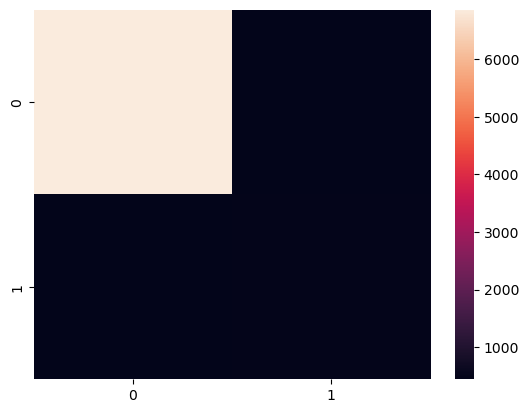

In [7]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precesion = precision_score(y_test, y_pred)
confussion = confusion_matrix(y_test, y_pred)

DT = [accuracy, recall, f1, precesion, confussion]
sns.heatmap(confussion)

# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

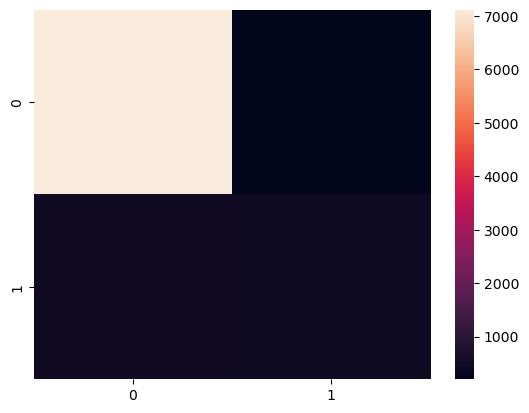

In [9]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precesion = precision_score(y_test, y_pred)
confussion = confusion_matrix(y_test, y_pred)

LR = [accuracy, recall, f1, precesion, confussion]
sns.heatmap(confussion)

# Support Vector Machine

In [10]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear').fit(X_train, y_train)

<Axes: >

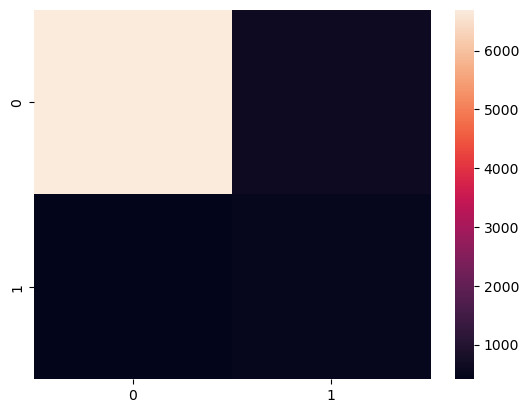

In [11]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precesion = precision_score(y_test, y_pred)
confussion = confusion_matrix(y_test, y_pred)

SVM = [accuracy, recall, f1, precesion, confussion]
sns.heatmap(confussion)

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train, y_train)

<Axes: >

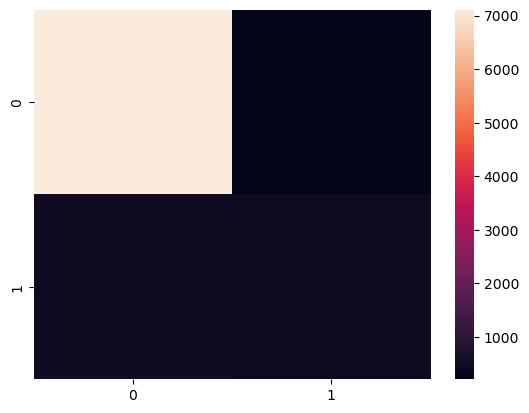

In [13]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precesion = precision_score(y_test, y_pred)
confussion = confusion_matrix(y_test, y_pred)

RF = [accuracy, recall, f1, precesion, confussion]
sns.heatmap(confussion)

# Neural Network 

In [14]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier().fit(X_train, y_train)

<Axes: >

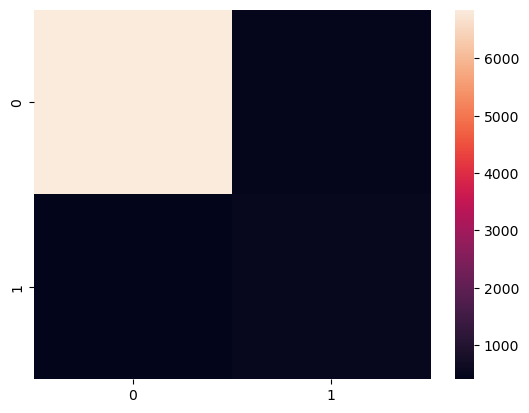

In [15]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precesion = precision_score(y_test, y_pred)
confussion = confusion_matrix(y_test, y_pred)

NN = [accuracy, recall, f1, precesion, confussion]
sns.heatmap(confussion)

# Evaluation

In [16]:
eval = pd.DataFrame({
    'Decesion Tree': DT, 
    'Random Forest': RF, 
    'Support Vector Machine': SVM, 
    'Logestic Regression': LR, 
    'Neural Network': NN
}, index = ['accuracy', 'recall', 'f1', 'precesion', 'confussion'])
eval

,Decesion Tree,Random Forest,Support Vector Machine,Logestic Regression,Neural Network
accuracy,0.890386,0.916849,0.874484,0.916849,0.893785
recall,0.516866,0.479869,0.552775,0.475517,0.559304
f1,0.512682,0.562859,0.49561,0.560616,0.5402
precesion,0.508565,0.680556,0.44916,0.682813,0.522358
confussion,"[[6860, 459], [444, 475]]","[[7112, 207], [478, 441]]","[[6696, 623], [411, 508]]","[[7116, 203], [482, 437]]","[[6849, 470], [405, 514]]"
